# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [661]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how='left')

# Display the data table for preview
display(combined_df)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [662]:
# Checking the number of mice.
unique_mice = combined_df['Mouse ID'].nunique()
unique_mice

249

In [663]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_data = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicated_mice_IDs = np.unique(duplicated_data['Mouse ID'])
display(duplicated_mice_IDs)

array(['g989'], dtype=object)

In [664]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_info = combined_df.loc[combined_df['Mouse ID'] == duplicated_mice_IDs[0]]
print(duplicate_mice_info)

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         30           59.082294        

In [665]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_clean_df = combined_df.loc[combined_df['Mouse ID'] != duplicated_mice_IDs[0]]
combined_clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [666]:
# Checking the number of mice in the clean DataFrame.
clean_unique_mice = combined_clean_df['Mouse ID'].nunique()
print(clean_unique_mice)

248


## Summary Statistics

In [667]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
Stats_by_Regimen_TumorVol = combined_clean_df.set_index(["Drug Regimen"])['Tumor Volume (mm3)']

Mean_vol = Stats_by_Regimen_TumorVol.groupby('Drug Regimen').mean().rename('Mean Tumor Volume')
Median_vol = Stats_by_Regimen_TumorVol.groupby('Drug Regimen').median().rename('Median Tumor Volume')
Variance_vol = Stats_by_Regimen_TumorVol.groupby('Drug Regimen').var().rename('Tumor Volume Variance')
Std_Dev_vol = Stats_by_Regimen_TumorVol.groupby('Drug Regimen').std().rename('Tumor Volume Std. Dev')
Std_Err_vol = Stats_by_Regimen_TumorVol.groupby('Drug Regimen').sem().rename('Tumor Volume Std. Err')

Stats_by_Regimen_summary = pd.concat([Mean_vol, Median_vol, Variance_vol, Std_Dev_vol, Std_Err_vol], axis=1)
Stats_by_Regimen_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [668]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df = Stats_by_Regimen_TumorVol.groupby('Drug Regimen').agg(['mean', 'median', 'var', 'std', 'sem'])
display(summary_df.style.set_caption("Tumor Volume (mm3)"))

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

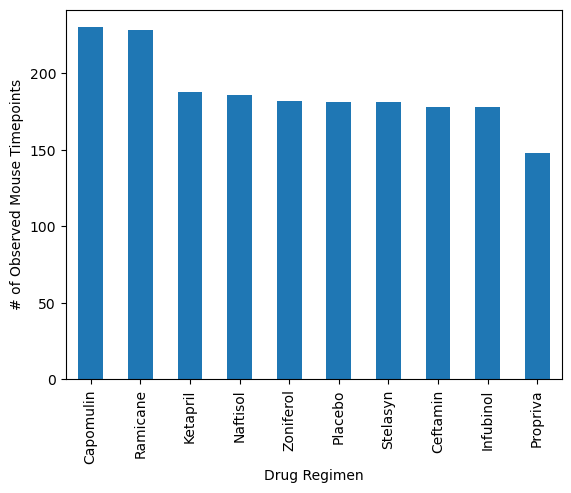

In [669]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

num_points = combined_clean_df.groupby('Drug Regimen')['Timepoint'].size()
num_points = num_points.sort_values(ascending=False)
num_points.plot(kind="bar", xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints')


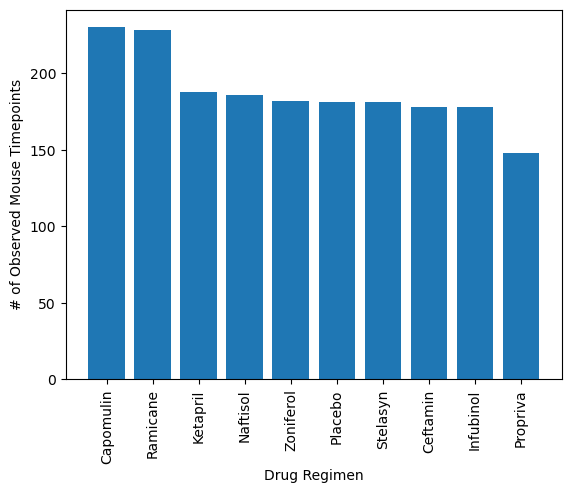

In [670]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
num_timepoints = combined_clean_df.groupby('Drug Regimen')['Timepoint'].size()
num_timepoints = num_timepoints.sort_values(ascending=False)
plt.bar(num_timepoints.index, num_timepoints.values)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='Sex'>

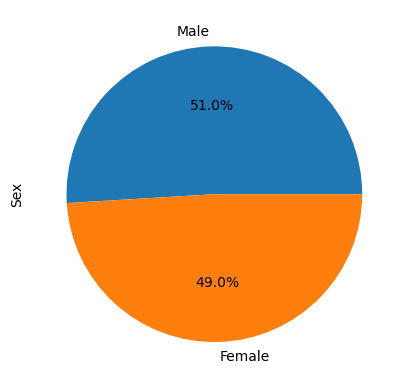

In [671]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sexes = combined_clean_df['Sex'].value_counts()
sexes.plot(kind="pie", autopct='%1.1f%%', ylabel = 'Sex')


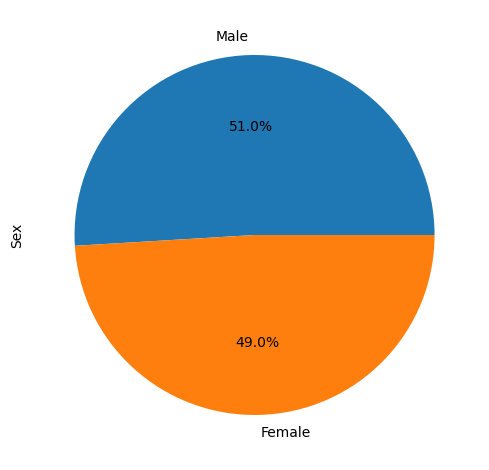

In [672]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sexes = combined_clean_df['Sex'].value_counts()
males = sexes['Male']
females = sexes['Female']

plt.pie([males, females], labels=['Male', 'Female'], autopct = '%1.1f%%')
plt.ylabel('Sex')
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [673]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
filtered_regimens_df = combined_clean_df[(combined_clean_df['Drug Regimen'] == 'Capomulin') | (combined_clean_df['Drug Regimen'] == 'Ramicane') | (combined_clean_df['Drug Regimen'] == 'Infubinol') | (combined_clean_df['Drug Regimen'] == 'Ceftamin')]

# Start by getting the last (greatest) timepoint for each mouse
filtered_regimens_gdf = filtered_regimens_df.groupby(['Drug Regimen','Mouse ID'])['Timepoint'].max()
filtered_regimens_gdf.reset_index()
# display(filtered_regimens_gdf.head(100))
# # Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_gdf = pd.merge(filtered_regimens_gdf, combined_clean_df, on=['Drug Regimen','Mouse ID', 'Timepoint'], how='left')
display(merged_gdf.head(100))

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,Capomulin,b128,45,38.982878,2,Female,9,22
1,Capomulin,b742,45,38.939633,0,Male,7,21
2,Capomulin,f966,20,30.485985,0,Male,16,17
3,Capomulin,g288,45,37.074024,1,Male,3,19
4,Capomulin,g316,45,40.159220,2,Female,22,22
...,...,...,...,...,...,...,...,...
95,Ramicane,s508,45,30.276232,0,Male,1,17
96,Ramicane,u196,45,40.667713,3,Male,18,25
97,Ramicane,w678,5,43.166373,0,Female,5,24
98,Ramicane,y449,15,44.183451,0,Male,19,24


In [674]:
# Put treatments into a list for for loop (and later for plot labels)
regimens_names_list = merged_gdf['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for row in regimens_names_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment = merged_gdf['Drug Regimen'] == row
    treatments_df = merged_gdf[treatment]['Tumor Volume (mm3)'].sort_values()
    
    # add subset 
    tumor_vol_data.append(treatments_df)
    
    # Determine outliers using upper and lower bounds
    quartiles = treatments_df.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers_range = (treatments_df < lower_bound) | (treatments_df > upper_bound)
    outlier = treatments_df[outliers_range]
    print(f"{row}'s potential outliers: {outlier}")
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 55    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


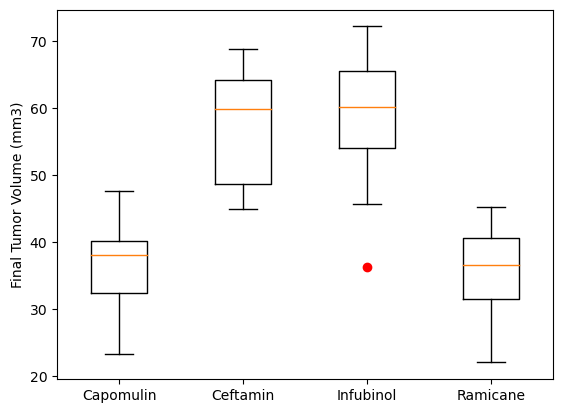

In [675]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
labels = regimens_names_list
ax1.boxplot(tumor_vol_data,0,'ro', labels=labels)
plt.show()

## Line and Scatter Plots

<Axes: title={'center': 'Capomulin treatment of mouse l509'}, xlabel='Timepoint (days)', ylabel='Tumor Volume (mm3)'>

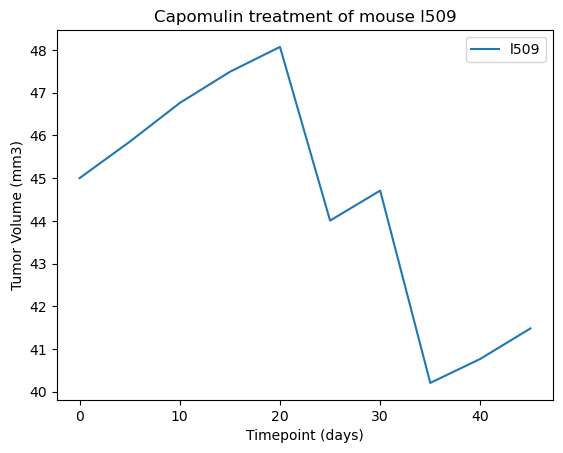

In [676]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_l509 = combined_clean_df[(combined_clean_df['Drug Regimen'] == "Capomulin") & (combined_clean_df['Mouse ID'] == "l509")]
mouse_l509.plot(x='Timepoint', y='Tumor Volume (mm3)', xlabel='Timepoint (days)', ylabel='Tumor Volume (mm3)', title="Capomulin treatment of mouse l509", label="l509")


<Axes: xlabel='Weight (g)', ylabel='Average Tumor Volume (mm3)'>

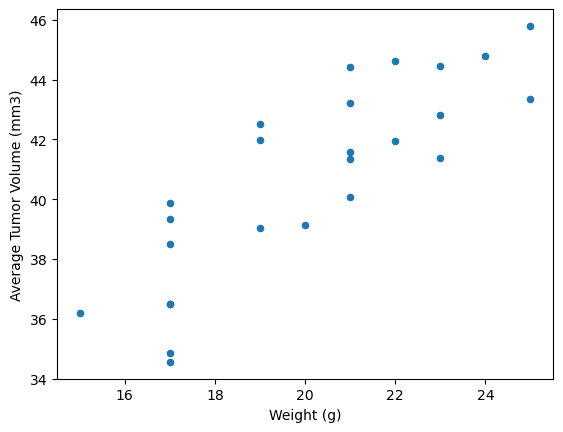

In [677]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_regimen = combined_clean_df[(combined_clean_df['Drug Regimen'] == "Capomulin")].groupby('Mouse ID')
# print(Capomulin_regimen)
Weight_Tumor_vol_df = Capomulin_regimen[['Weight (g)','Tumor Volume (mm3)']].mean()
# mouse_l509.plot(x='Timepoint', y='Tumor Volume (mm3)', xlabel='Timepoint (days)', ylabel='Tumor Volume (mm3)', title="Capomulin treatment of mouse l509", label="l509")
Weight_Tumor_vol_df.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', ylabel="Average Tumor Volume (mm3)")


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


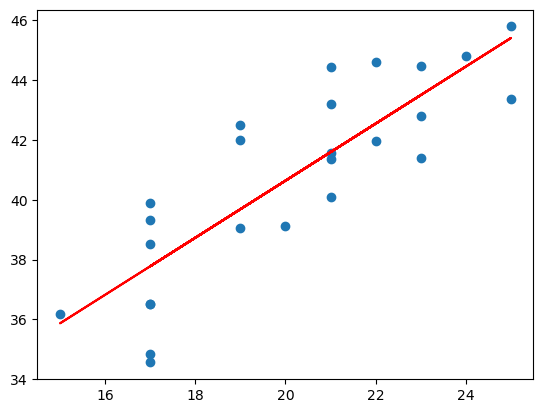

In [678]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(Weight_Tumor_vol_df['Weight (g)'], Weight_Tumor_vol_df['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation.statistic, 2)}")
# print(correlation.pvalue)

plt.scatter(Weight_Tumor_vol_df['Weight (g)'], Weight_Tumor_vol_df['Tumor Volume (mm3)'])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Weight_Tumor_vol_df['Weight (g)'], Weight_Tumor_vol_df['Tumor Volume (mm3)'])
regress_values = (Weight_Tumor_vol_df['Weight (g)']) * slope + intercept
plt.plot(Weight_Tumor_vol_df['Weight (g)'],regress_values,"r-")
plt.show()
